<a href="https://colab.research.google.com/github/BaronVonBussin/NewTransit/blob/main/innovative_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [1]:
import yfinance
print("yfinance is installed and working.")


yfinance is installed and working.


[*********************100%***********************]  1 of 1 completed


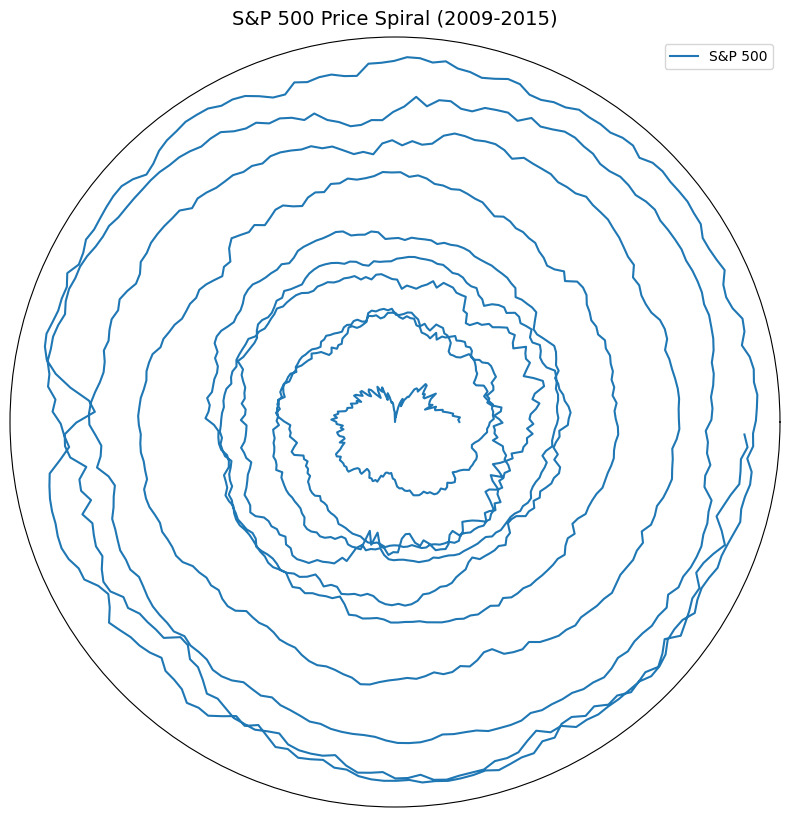

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Fetch S&P 500 data from Yahoo Finance
ticker = "^GSPC"
start_date = "2009-01-01"
end_date = "2015-12-31"

# Download the historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make 'Date' a column
data = data.reset_index()

# Normalize the adjusted close prices for spiral visualization
data['Normalized_Close'] = (data['Adj Close'] - data['Adj Close'].min()) / (data['Adj Close'].max() - data['Adj Close'].min())

# Convert the data index to radians for spiral representation
data['Radians'] = (data.index / len(data) * 2 * np.pi * 10)  # 10 full rotations

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.plot(data['Radians'], data['Normalized_Close'], label="S&P 500")

# Add labels and title
ax.set_title("S&P 500 Price Spiral (2009-2015)", va='bottom', fontsize=14)
ax.set_rlabel_position(-45)  # Adjust radial labels position
ax.set_yticks([])  # Hide radial ticks
ax.set_xticks([])  # Hide angular ticks

# Add legend and show plot
plt.legend(loc="upper right")
plt.show()


[*********************100%***********************]  1 of 1 completed


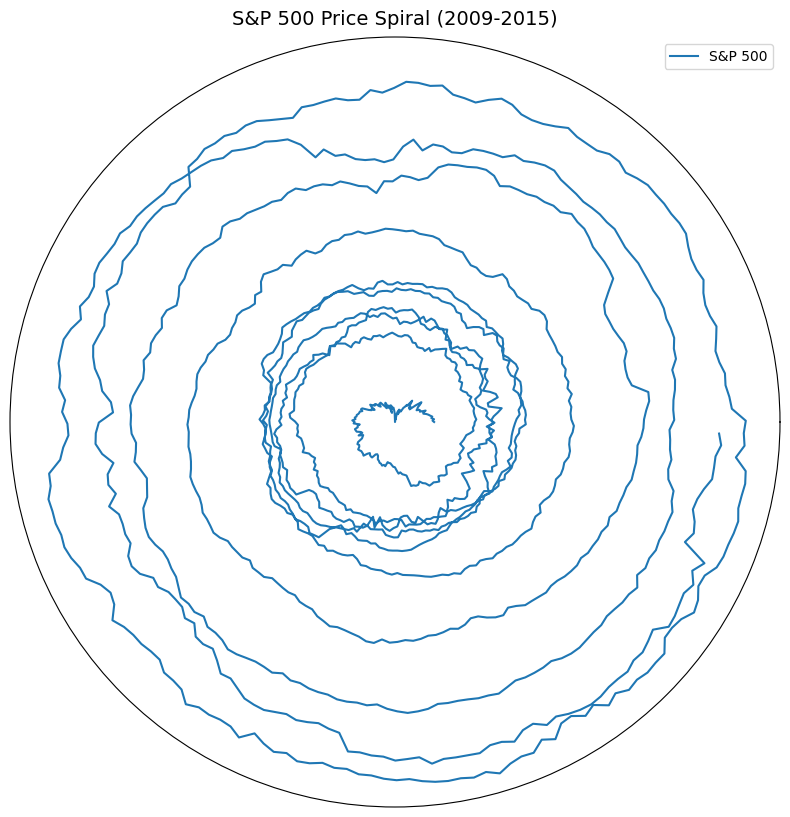

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Fetch S&P 500 data from Yahoo Finance
ticker = "MMM"
start_date = "2009-01-01"
end_date = "2015-12-31"

# Download the historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make 'Date' a column
data = data.reset_index()

# Normalize the adjusted close prices for spiral visualization
data['Normalized_Close'] = (data['Adj Close'] - data['Adj Close'].min()) / (data['Adj Close'].max() - data['Adj Close'].min())

# Convert the data index to radians for spiral representation
data['Radians'] = (data.index / len(data) * 2 * np.pi * 10)  # 10 full rotations

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.plot(data['Radians'], data['Normalized_Close'], label="S&P 500")

# Add labels and title
ax.set_title("S&P 500 Price Spiral (2009-2015)", va='bottom', fontsize=14)
ax.set_rlabel_position(-45)  # Adjust radial labels position
ax.set_yticks([])  # Hide radial ticks
ax.set_xticks([])  # Hide angular ticks

# Add legend and show plot
plt.legend(loc="upper right")
plt.show()


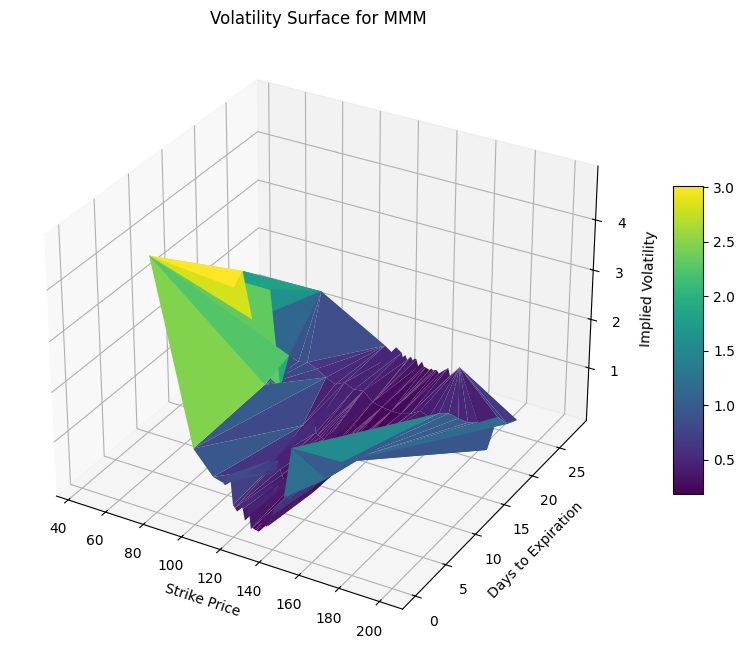

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fetch option chain data for MMM
ticker = "MMM"
stock = yf.Ticker(ticker)
options_dates = stock.options  # Fetch available expiration dates

# Prepare data for the volatility surface
volatility_data = []

for expiry in options_dates[:5]:  # Limiting to the first 5 expirations for efficiency
    opt_chain = stock.option_chain(expiry)
    calls = opt_chain.calls
    puts = opt_chain.puts

    # Combine calls and puts for simplicity in this example
    options = pd.concat([calls, puts])
    options['Expiry'] = expiry

    # Select relevant columns
    options = options[['strike', 'impliedVolatility', 'Expiry']]
    volatility_data.append(options)

# Combine all expirations into a single DataFrame
volatility_df = pd.concat(volatility_data)
volatility_df['ExpiryDays'] = pd.to_datetime(volatility_df['Expiry']).apply(lambda x: (x - pd.Timestamp.now()).days)

# Drop any rows with missing implied volatility
volatility_df = volatility_df.dropna(subset=['impliedVolatility'])

# Prepare data for 3D plotting
strikes = volatility_df['strike'].values
expirations = volatility_df['ExpiryDays'].values
implied_vols = volatility_df['impliedVolatility'].values

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for volatility surface
surf = ax.plot_trisurf(strikes, expirations, implied_vols, cmap="viridis", edgecolor="none")

# Label axes
ax.set_xlabel("Strike Price")
ax.set_ylabel("Days to Expiration")
ax.set_zlabel("Implied Volatility")
ax.set_title(f"Volatility Surface for {ticker}")

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Show plot
plt.show()
